In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")
submission = pd.read_csv("../input/titanic/gender_submission.csv")

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train_df[["Embarked","Survived","PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


<AxesSubplot:xlabel='Embarked'>

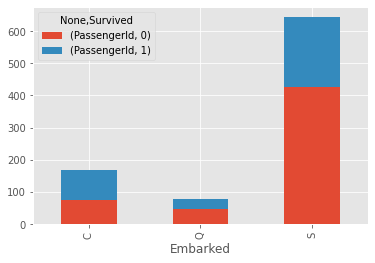

In [12]:
embarked_df = train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()
embarked_df.plot.bar(stacked=True)

In [13]:
embarked_df["survived_rate"]=embarked_df.iloc[:,0]/(embarked_df.iloc[:,0] + embarked_df.iloc[:,1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

<AxesSubplot:xlabel='Sex'>

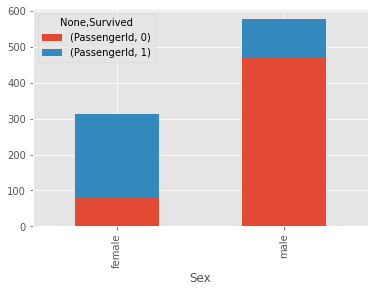

In [14]:
# p.099
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

<AxesSubplot:xlabel='Pclass'>

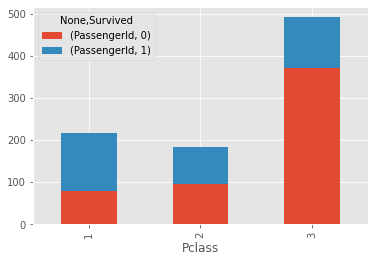

In [15]:
# p.100
ticket_df = train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

In [16]:
# p.101
# これがどうもValueErrorになってしまう
#plt.hist((train_df[train_df["Survived"] == 0][["Age"]].values, train_df[train_df["Survived"] == 1][["Age"]].values), 
#         histtype="barstacked", bins=8, label=("Death", "Survive"))
#plt.legend()

In [17]:
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


In [18]:
# p.104-p.104
train_corr = train_df_corr.corr()
# train_corr
#plt.figure(figsize=(9,9))
#sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

# p.106
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

# p.107
# all_df.isnull().sum()

# p.108
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
Fare_mean.columns = ["Pclass", "Fare_mean"]

# p.109
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean", axis=1)

# p.111
name_df = all_df["Name"].str.split("[,.]",2,expand=True)
name_df.columns = ["family_name", "honorific", "name"]
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

# p.112 各名称ごとの人数をカウントする
name_df["honorific"].value_counts()

# p.113 敬称ごとの年齢分布を確認する
all_df = pd.concat([all_df, name_df], axis=1)

# p.115 敬称ごとの年齢の分布を確認
#plt.figure(figsize=(18, 5))
#sns.boxplot(x="honorific", y="Age", data=all_df)

# 敬称ごとの年齢の平均値を確認する
#all_df[["Age", "honorific"]].groupby("honorific").mean()

# p.116 敬称ごとの生存率の違いについて確認する
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)], axis=1)
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
#honorific_df.plot.bar(stacked=True)

# p.118 年齢が欠損しているものは、敬称ごとの平均年齢で補完する
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific", "honorific_Age"]
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
all_df.loc[(all_df["Age"].isnull()), "Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"], axis=1)

# 家族人数を追加する
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
#all_df["family_num"].value_counts()

# p.119 同船している家族人数が0人（1人乗船）かどうかを表すaloneという変数を追加する
all_df.loc[all_df["family_num"]==0, "alone"] = 1
all_df["alone"].fillna(0, inplace=True)

# 不要な変数を削除する
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis=1)

# p.120 カテゴリ変数を数値に変換する
categories = all_df.columns[all_df.dtypes == "object"]
# print(categories)

# 敬称はMr, Miss, Mrs, Master以外は数が少ないため、otherとして統合する
all_df.loc[~((all_df["honorific"]=="Mr") | (all_df["honorific"]=="Miss") | (all_df["honorific"]=="Mrs") | (all_df["honorific"]=="Master")), "honorific"] = "other"
# all_df.honorific.value_counts()

# p.121 文字列を数値に変換する:Label Encoding
from sklearn.preprocessing import LabelEncoder
all_df["Embarked"].fillna("missing", inplace=True)

le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])